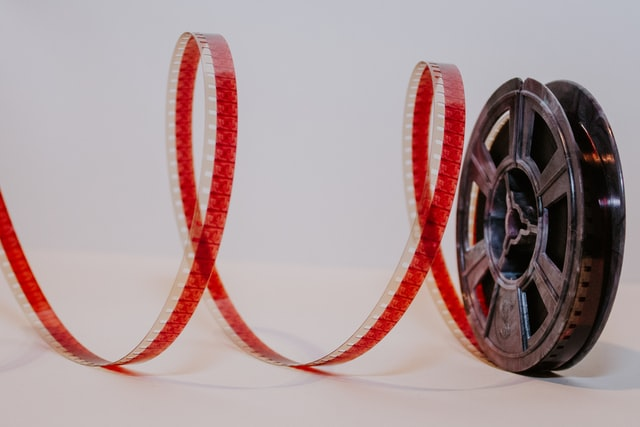

# Current Movie Industry Analysis
## Author: Diane Tunnicliffe

## Overview

I have been tasked with assisting Microsoft in their venture into the movie industry. My goal is to explore what type of films are currently doing the best at the box office and to provide these findings to Microsoft's new movie studio executives. My analysis of the movie industry, achieved by garnering data and utilizing descriptive statistics and visualizations, has shown that FINDING GOES HERE. Microsoft can use this report to target their specific genre and release-time of their upcoming movie endeavors to generate the highest amount of revenue possible. 

## Business Problem

I have been informed that Microsoft wants to venture into the movie-making business, but that they are unsure of where to begin. The challenge for their new movie studio is that they are ready to jump into the industry but do not have the necessary knowledge to move forward. To assist them with this goal, I have been looking at the movies that performed highest in domestic, international, and worldwide box office amounts for this year as well as the past five years. By analyzing the movies that have been most successful, I can make recommendations about attributes that Microsoft's movies should have in order to achieve the highest revenue.  I have based my analysis on three things:
* Genre: what types of movies are currently most successful?
* Release Month/Season: when is the most lucrative time to release a movie?
* Production Method: is there a particular production method that tends to achieve the highest revenue?  

I chose these questions after combing through the data I had been given, as well as additional data that I obtained from outside sources. I have determined that the criteria listed above are integral in order to guide the steps that should be taken when considering how to produce the most profitable movie in today's climate.

## Data Understanding

The bulk of the data used for this project was obtained from The-Numbers.com, a free data source that is described as "the premier provider of movie industry data and research services". This website contains domestic, international, and worldwide box office revenue amounts per movie, and allows filtering and ordering of results based on many different criteria. Some of the criteria provided on this site that I found especially useful were the same criteria listed above: genre, release date, and production method. After considering various datasets from other sources, I elected to use this one because of how customizable, straightforward, and credible it is. For the purposes of this project, I generated reports for the top 100 movies per year, in terms of revenue, from 2015 to 2020.  

In [191]:
# importing the packages I will be using for this project
import pandas as pd
pd.options.display.float_format = '{:.2f}'.format
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from bs4 import BeautifulSoup
import requests

%matplotlib inline

### 2015
My first step was to obtain data for the top 100 grossing movies of 2015. I did this by generating a report on The-Numbers.com, scraping this data, and reading it into a pandas DataFrame.

In [192]:
# url for the full customized report of top 100 movies for release years in range listed
url = f"https://www.the-numbers.com/movies/report/All/All/All/All/All/All/United-States/All/All/None/None/2015/2015/None/None/None/None/None/None?show-release-date=On&view-order-by=domestic-box-office&show-release-year=On&view-order-direction=desc&show-domestic-box-office=On&show-international-box-office=On&show-worldwide-box-office=On&show-genre=On&show-production-method=On"
response = requests.get(url)
# creating soup
soup = BeautifulSoup(response.text, 'lxml')
# finding table containing report info
table = soup.find('table')
# converting html of table into a string 
table_string = f"""{table}"""
# reading html string into pandas
table_read = pd.read_html(table_string)
# converting into DataFrame
numbers_2015 = table_read[0]
# previewing DataFrame
numbers_2015.head()

,Unnamed: 0,Released,Released.1,Title,Genre,ProductionMethod,DomesticBox Office,InternationalBox Office,WorldwideBox Office
0,1,"Dec 18, 2015",2015,Star Wars Ep. VII: The Force Awakens,Adventure,Animation/Live Action,"$936,662,225","$1,128,815,859","$2,065,478,084"
1,2,"Jun 12, 2015",2015,Jurassic World,Action,Live Action,"$652,270,625","$1,017,673,342","$1,669,943,967"
2,3,"May 1, 2015",2015,Avengers: Age of Ultron,Action,Animation/Live Action,"$459,005,868","$937,093,334","$1,396,099,202"
3,4,"Jun 19, 2015",2015,Inside Out,Adventure,Digital Animation,"$356,461,711","$498,748,492","$855,210,203"
4,5,"Apr 3, 2015",2015,Furious 7,Action,Live Action,"$353,007,020","$1,165,715,774","$1,518,722,794"


Now that I had a DataFrame to work with, I was able to start running some summary statistics and exploring the data.

In [193]:
numbers_2015.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 9 columns):
Unnamed: 0                 100 non-null int64
Released                   100 non-null object
Released.1                 100 non-null int64
Title                      100 non-null object
Genre                      100 non-null object
ProductionMethod           100 non-null object
DomesticBox Office         100 non-null object
InternationalBox Office    100 non-null object
WorldwideBox Office        100 non-null object
dtypes: int64(2), object(7)
memory usage: 7.2+ KB


In [194]:
numbers_2015.describe()

,Unnamed: 0,Released.1
count,100.00,100.00
mean,50.50,2015.00
std,29.01,0.00
min,1.00,2015.00
25%,25.75,2015.00
50%,50.50,2015.00
75%,75.25,2015.00
max,100.00,2015.00


In [195]:
numbers_2015['DomesticBox Office'].dtype

dtype('O')

I noted that the describe method was not very helpful at this point because my dollar amounts for domestic, international, and worldwide gross were pulled as objects (not floats or integers). I knew that would require further adjusting in the next stage.

In [196]:
# getting value counts for Genre column
numbers_2015.Genre.value_counts()

Adventure            20
Drama                20
Action               18
Comedy               17
Thriller/Suspense    13
Horror                9
Romantic Comedy       1
Black Comedy          1
Western               1
Name: Genre, dtype: int64

Right off the bat, it was apparent that Adventure and Drama were the most successful movie genres in 2015, with Action and Comedy as close seconds.

In [197]:
# getting value counts for Production Method column
numbers_2015['ProductionMethod'].value_counts()

Live Action              85
Animation/Live Action     9
Digital Animation         6
Name: ProductionMethod, dtype: int64

For 2015 production methods, Live Action was undeniably the way to go, with 85% of the top grossing movies being of this type.

### 2016
Since I knew I'd be scraping data for each year in the exact same way as above, I created a function to speed up the process.

In [198]:
# scraping 100 top grossing movies from The Numbers based on input year
def number_scraper(year):
    # url for the full customized report of top 100 movies for release years in range listed
    url = f"https://www.the-numbers.com/movies/report/All/All/All/All/All/All/United-States/All/All/None/None/{year}/{year}/None/None/None/None/None/None?show-release-date=On&view-order-by=domestic-box-office&show-release-year=On&view-order-direction=desc&show-domestic-box-office=On&show-international-box-office=On&show-worldwide-box-office=On&show-genre=On&show-production-method=On"
    response = requests.get(url)
    # creating soup
    soup = BeautifulSoup(response.text, 'lxml')
    # finding table
    table = soup.find('table')
    # converting html of table into string 
    table_string = f"""{table}"""
    # reading html string into pandas
    table_read = pd.read_html(table_string)
    # converting into DataFrame
    numbers_df = table_read[0]
    return numbers_df

In [199]:
# scraping 2016 data and compiling into DataFrame
numbers_2016 = number_scraper(2016)
numbers_2016.head()

,Unnamed: 0,Released,Released.1,Title,Genre,ProductionMethod,DomesticBox Office,InternationalBox Office,WorldwideBox Office
0,1,"Dec 16, 2016",2016,Rogue One: A Star Wars Story,Adventure,Animation/Live Action,"$532,177,324","$523,879,949","$1,056,057,273"
1,2,"Jun 17, 2016",2016,Finding Dory,Adventure,Digital Animation,"$486,295,561","$538,710,564","$1,025,006,125"
2,3,"May 6, 2016",2016,Captain America: Civil War,Action,Live Action,"$408,084,349","$743,834,172","$1,151,918,521"
3,4,"Jul 8, 2016",2016,The Secret Life of Pets,Adventure,Digital Animation,"$368,384,330","$518,222,082","$886,606,412"
4,5,"Apr 15, 2016",2016,The Jungle Book,Adventure,Animation/Live Action,"$364,001,123","$596,358,986","$960,360,109"


In [200]:
numbers_2016.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 9 columns):
Unnamed: 0                 100 non-null int64
Released                   100 non-null object
Released.1                 100 non-null int64
Title                      100 non-null object
Genre                      100 non-null object
ProductionMethod           100 non-null object
DomesticBox Office         100 non-null object
InternationalBox Office    100 non-null object
WorldwideBox Office        100 non-null object
dtypes: int64(2), object(7)
memory usage: 7.2+ KB


In [201]:
# getting value counts for Genre column
numbers_2016.Genre.value_counts()

Adventure              21
Comedy                 18
Drama                  18
Action                 14
Thriller/Suspense      13
Horror                  7
Romantic Comedy         3
Musical                 2
Western                 2
Concert/Performance     1
Black Comedy            1
Name: Genre, dtype: int64

For 2016, Adventure once again held the top spot, with Comedy and Drama coming in second.

In [202]:
# getting value counts for Production Method column
numbers_2016['ProductionMethod'].value_counts()

Live Action              76
Animation/Live Action    12
Digital Animation        11
Stop-Motion Animation     1
Name: ProductionMethod, dtype: int64

And again, Live Action dominated the list.

### 2017

In [203]:
# scraping 2017 data and compiling into DataFrame
numbers_2017 = number_scraper(2017)
numbers_2017.head()

,Unnamed: 0,Released,Released.1,Title,Genre,ProductionMethod,DomesticBox Office,InternationalBox Office,WorldwideBox Office
0,1,"Dec 15, 2017",2017,Star Wars Ep. VIII: The Last Jedi,Adventure,Animation/Live Action,"$620,181,382","$712,358,507","$1,332,539,889"
1,2,"Mar 17, 2017",2017,Beauty and the Beast,Musical,Animation/Live Action,"$504,014,165","$752,128,924","$1,256,143,089"
2,3,"Jun 2, 2017",2017,Wonder Woman,Action,Live Action,"$412,563,408","$406,229,647","$818,793,055"
3,4,"Dec 20, 2017",2017,Jumanji: Welcome to the Jungle,Adventure,Live Action,"$404,508,916","$556,721,277","$961,230,193"
4,5,"May 5, 2017",2017,Guardians of the Galaxy Vol 2,Action,Animation/Live Action,"$389,813,101","$479,300,000","$869,113,101"


In [204]:
numbers_2017.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 9 columns):
Unnamed: 0                 100 non-null int64
Released                   100 non-null object
Released.1                 100 non-null int64
Title                      100 non-null object
Genre                      100 non-null object
ProductionMethod           100 non-null object
DomesticBox Office         100 non-null object
InternationalBox Office    100 non-null object
WorldwideBox Office        100 non-null object
dtypes: int64(2), object(7)
memory usage: 7.2+ KB


In [205]:
# getting value counts for Genre column
numbers_2017.Genre.value_counts()

Adventure            20
Action               20
Comedy               14
Drama                14
Thriller/Suspense    13
Horror                9
Musical               3
Black Comedy          3
Romantic Comedy       2
Western               2
Name: Genre, dtype: int64

In 2017, Adventure and Action tied for first place.

In [206]:
# getting value counts for Production Method column
numbers_2017['ProductionMethod'].value_counts()

Live Action              79
Digital Animation        13
Animation/Live Action     8
Name: ProductionMethod, dtype: int64

### 2018

In [207]:
# scraping 2018 data and compiling into DataFrame
numbers_2018 = number_scraper(2018)
numbers_2018.head()

,Unnamed: 0,Released,Released.1,Title,Genre,ProductionMethod,DomesticBox Office,InternationalBox Office,WorldwideBox Office
0,1,"Feb 16, 2018",2018,Black Panther,Action,Live Action,"$700,059,566","$639,674,336","$1,339,733,902"
1,2,"Apr 27, 2018",2018,Avengers: Infinity War,Action,Animation/Live Action,"$678,815,482","$1,365,725,041","$2,044,540,523"
2,3,"Jun 15, 2018",2018,Incredibles 2,Adventure,Digital Animation,"$608,581,744","$634,223,615","$1,242,805,359"
3,4,"Jun 22, 2018",2018,Jurassic World: Fallen Kingdom,Action,Live Action,"$417,719,760","$890,614,245","$1,308,334,005"
4,5,"Dec 21, 2018",2018,Aquaman,Action,Animation/Live Action,"$335,061,807","$808,904,713","$1,143,966,520"


In [208]:
numbers_2018.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 9 columns):
Unnamed: 0                 100 non-null int64
Released                   100 non-null object
Released.1                 100 non-null int64
Title                      100 non-null object
Genre                      100 non-null object
ProductionMethod           100 non-null object
DomesticBox Office         100 non-null object
InternationalBox Office    100 non-null object
WorldwideBox Office        100 non-null object
dtypes: int64(2), object(7)
memory usage: 7.2+ KB


In [209]:
# getting value counts for Genre column
numbers_2018.Genre.value_counts()

Action               25
Adventure            17
Comedy               16
Drama                15
Horror               10
Thriller/Suspense    10
Musical               2
Romantic Comedy       2
Black Comedy          2
Documentary           1
Name: Genre, dtype: int64

Action surpassed Adventure as the highest-grossing genre for 2018.

In [210]:
# getting value counts for Production Method column
numbers_2018['ProductionMethod'].value_counts()

Live Action              78
Animation/Live Action    13
Digital Animation         8
Stop-Motion Animation     1
Name: ProductionMethod, dtype: int64

### 2019

In [211]:
# scraping 2019 data and compiling into DataFrame
numbers_2019 = number_scraper(2019)
numbers_2019.head()

,Unnamed: 0,Released,Released.1,Title,Genre,ProductionMethod,DomesticBox Office,InternationalBox Office,WorldwideBox Office
0,1,"Apr 26, 2019",2019,Avengers: Endgame,Action,Animation/Live Action,"$858,373,000","$1,939,427,564","$2,797,800,564"
1,2,"Jul 19, 2019",2019,The Lion King,Adventure,Animation/Live Action,"$543,638,043","$1,112,503,536","$1,656,141,579"
2,3,"Dec 20, 2019",2019,Star Wars: The Rise of Skywalker,Adventure,Animation/Live Action,"$515,202,542","$557,741,680","$1,072,944,222"
3,4,"Nov 22, 2019",2019,Frozen II,Adventure,Digital Animation,"$477,373,578","$970,176,133","$1,447,549,711"
4,5,"Jun 21, 2019",2019,Toy Story 4,Adventure,Digital Animation,"$434,038,008","$639,356,805","$1,073,394,813"


In [212]:
numbers_2019.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 9 columns):
Unnamed: 0                 100 non-null int64
Released                   100 non-null object
Released.1                 100 non-null int64
Title                      100 non-null object
Genre                      100 non-null object
ProductionMethod           100 non-null object
DomesticBox Office         100 non-null object
InternationalBox Office    100 non-null object
WorldwideBox Office        100 non-null object
dtypes: int64(2), object(7)
memory usage: 7.2+ KB


In [213]:
# getting value counts for Genre column
numbers_2019.Genre.value_counts()

Adventure            21
Drama                18
Thriller/Suspense    15
Action               15
Horror               13
Comedy               12
Romantic Comedy       3
Black Comedy          2
Musical               1
Name: Genre, dtype: int64

Adventure has taken the lead once more for 2019.

In [214]:
# getting value counts for Production Method column
numbers_2019['ProductionMethod'].value_counts()

Live Action              77
Animation/Live Action    12
Digital Animation        11
Name: ProductionMethod, dtype: int64

### 2020
I think we can all agree that things got a little weird in 2020, to say the least. I was curious to see how the global pandemic had impacted the movie industry and the trends I'd observed thus far. While I suspected that revenue would be down due to widespread theater shutdowns, I was wondering whether the patterns I'd been observing would remain.

In [215]:
# scraping 2020 data and compiling into DataFrame
numbers_2020 = number_scraper(2020)
numbers_2020.head()

,Unnamed: 0,Released,Released.1,Title,Genre,ProductionMethod,DomesticBox Office,InternationalBox Office,WorldwideBox Office
0,1,"Jan 17, 2020",2020,Bad Boys For Life,Action,Live Action,"$204,417,855","$220,161,959","$424,579,814"
1,2,"Feb 14, 2020",2020,Sonic The Hedgehog,Adventure,Animation/Live Action,"$146,066,470","$159,416,630","$305,483,100"
2,3,"Feb 7, 2020",2020,Birds of Prey (And the Fantabulous Em…,Action,Live Action,"$84,158,461","$117,700,000","$201,858,461"
3,4,"Jan 17, 2020",2020,Dolittle,Adventure,Animation/Live Action,"$77,047,065","$172,064,722","$249,111,787"
4,5,"Feb 28, 2020",2020,The Invisible Man,Horror,Live Action,"$64,914,050","$70,028,631","$134,942,681"


In [216]:
numbers_2020.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 9 columns):
Unnamed: 0                 100 non-null int64
Released                   100 non-null object
Released.1                 100 non-null int64
Title                      100 non-null object
Genre                      99 non-null object
ProductionMethod           100 non-null object
DomesticBox Office         100 non-null object
InternationalBox Office    100 non-null object
WorldwideBox Office        100 non-null object
dtypes: int64(2), object(7)
memory usage: 7.2+ KB


In [217]:
# getting value counts for Genre column
numbers_2020.Genre.value_counts()

Drama                  25
Thriller/Suspense      17
Horror                 15
Documentary            12
Comedy                  9
Action                  8
Adventure               5
Romantic Comedy         4
Concert/Performance     2
Black Comedy            1
Multiple Genres         1
Name: Genre, dtype: int64

Wow! This was unexpected. Suddenly, Action and Adventure have taken a back seat to Drama and Thriller/Suspense. Even the Documentary genre had surpassed them! This was getting interesting, and making things a bit more convoluted.

In [218]:
# getting value counts for Production Method column
numbers_2020['ProductionMethod'].value_counts()

Live Action              96
Animation/Live Action     2
Digital Animation         2
Name: ProductionMethod, dtype: int64

Well, at least Live Action still holds its position.

## Data Preparation
### Cleaning

Now that I had all my data ready to go, it was time to clean it up and prepare it for analysis. Due to the fact that I compiled my data from tables that were completely filled in, I was pleased that I had no null values to deal with. I did, however, have an unnecessary column called Unnamed, which was used as the index of each table in its original html format. I began by dropping this.

In [219]:
numbers_2015.isnull().sum()

Unnamed: 0                 0
Released                   0
Released.1                 0
Title                      0
Genre                      0
ProductionMethod           0
DomesticBox Office         0
InternationalBox Office    0
WorldwideBox Office        0
dtype: int64

In [220]:
numbers_2015 = numbers_2015.drop(columns='Unnamed: 0')
numbers_2015.head()

,Released,Released.1,Title,Genre,ProductionMethod,DomesticBox Office,InternationalBox Office,WorldwideBox Office
0,"Dec 18, 2015",2015,Star Wars Ep. VII: The Force Awakens,Adventure,Animation/Live Action,"$936,662,225","$1,128,815,859","$2,065,478,084"
1,"Jun 12, 2015",2015,Jurassic World,Action,Live Action,"$652,270,625","$1,017,673,342","$1,669,943,967"
2,"May 1, 2015",2015,Avengers: Age of Ultron,Action,Animation/Live Action,"$459,005,868","$937,093,334","$1,396,099,202"
3,"Jun 19, 2015",2015,Inside Out,Adventure,Digital Animation,"$356,461,711","$498,748,492","$855,210,203"
4,"Apr 3, 2015",2015,Furious 7,Action,Live Action,"$353,007,020","$1,165,715,774","$1,518,722,794"


I then made all the column names lowercase to make them easier to work with.

In [221]:
numbers_2015.columns = [x.lower() for x in numbers_2015.columns]
numbers_2015.columns

Index(['released', 'released.1', 'title', 'genre', 'productionmethod',
       'domesticbox office', 'internationalbox office', 'worldwidebox office'],
      dtype='object')

I also wanted to change some of the column names to make them more comprehensive.

In [222]:
numbers_2015 = numbers_2015.rename(columns = {'released':'release_date', 'released.1':'release_year', 'productionmethod':'prod_method', 'domesticbox office':'dom_gross', 'internationalbox office':'int_gross', 'worldwidebox office':'world_gross'})
numbers_2015.columns

Index(['release_date', 'release_year', 'title', 'genre', 'prod_method',
       'dom_gross', 'int_gross', 'world_gross'],
      dtype='object')

Finally, I wanted to convert the dollar amounts to numbers I could actually work with.

In [223]:
# removing dollar signs and commas from dollar amounts
# converting dollar amounts from strings into integers
numbers_2015['dom_gross'] = numbers_2015['dom_gross'].str.replace(',', '').str.replace('$', '').astype(int)
numbers_2015['int_gross'] = numbers_2015['int_gross'].str.replace(',', '').str.replace('$', '').astype(int)
numbers_2015['world_gross'] = numbers_2015['world_gross'].str.replace(',', '').str.replace('$', '').astype(int)
numbers_2015.head()

,release_date,release_year,title,genre,prod_method,dom_gross,int_gross,world_gross
0,"Dec 18, 2015",2015,Star Wars Ep. VII: The Force Awakens,Adventure,Animation/Live Action,936662225,1128815859,2065478084
1,"Jun 12, 2015",2015,Jurassic World,Action,Live Action,652270625,1017673342,1669943967
2,"May 1, 2015",2015,Avengers: Age of Ultron,Action,Animation/Live Action,459005868,937093334,1396099202
3,"Jun 19, 2015",2015,Inside Out,Adventure,Digital Animation,356461711,498748492,855210203
4,"Apr 3, 2015",2015,Furious 7,Action,Live Action,353007020,1165715774,1518722794


Since this is how I intended to clean all my DataFrames, I wrote a function to execute all the steps I had taken.

In [224]:
def clean(df):
    # drop 'Unnamed' column
    df = df.drop(columns='Unnamed: 0')
    # make column names lowercase
    df.columns = [x.lower() for x in df.columns]
    # rename certain columns
    df = df.rename(columns = {'released':'release_date', 'released.1':'release_year', 'productionmethod':'prod_method', 'domesticbox office':'dom_gross', 'internationalbox office':'int_gross', 'worldwidebox office':'world_gross'})
    # removing dollar signs and commas from dollar amounts
    # converting dollar amounts from strings into integers
    df['dom_gross'] = df['dom_gross'].str.replace(',', '').str.replace('$', '').astype(int)
    df['int_gross'] = df['int_gross'].str.replace(',', '').str.replace('$', '').astype(int)
    df['world_gross'] = df['world_gross'].str.replace(',', '').str.replace('$', '').astype(int)
    return df

In [225]:
numbers_2016 = clean(numbers_2016)
numbers_2016.head()

,release_date,release_year,title,genre,prod_method,dom_gross,int_gross,world_gross
0,"Dec 16, 2016",2016,Rogue One: A Star Wars Story,Adventure,Animation/Live Action,532177324,523879949,1056057273
1,"Jun 17, 2016",2016,Finding Dory,Adventure,Digital Animation,486295561,538710564,1025006125
2,"May 6, 2016",2016,Captain America: Civil War,Action,Live Action,408084349,743834172,1151918521
3,"Jul 8, 2016",2016,The Secret Life of Pets,Adventure,Digital Animation,368384330,518222082,886606412
4,"Apr 15, 2016",2016,The Jungle Book,Adventure,Animation/Live Action,364001123,596358986,960360109


In [226]:
numbers_2017 = clean(numbers_2017)
numbers_2017.head()

,release_date,release_year,title,genre,prod_method,dom_gross,int_gross,world_gross
0,"Dec 15, 2017",2017,Star Wars Ep. VIII: The Last Jedi,Adventure,Animation/Live Action,620181382,712358507,1332539889
1,"Mar 17, 2017",2017,Beauty and the Beast,Musical,Animation/Live Action,504014165,752128924,1256143089
2,"Jun 2, 2017",2017,Wonder Woman,Action,Live Action,412563408,406229647,818793055
3,"Dec 20, 2017",2017,Jumanji: Welcome to the Jungle,Adventure,Live Action,404508916,556721277,961230193
4,"May 5, 2017",2017,Guardians of the Galaxy Vol 2,Action,Animation/Live Action,389813101,479300000,869113101


In [227]:
numbers_2018 = clean(numbers_2018)
numbers_2018.head()

,release_date,release_year,title,genre,prod_method,dom_gross,int_gross,world_gross
0,"Feb 16, 2018",2018,Black Panther,Action,Live Action,700059566,639674336,1339733902
1,"Apr 27, 2018",2018,Avengers: Infinity War,Action,Animation/Live Action,678815482,1365725041,2044540523
2,"Jun 15, 2018",2018,Incredibles 2,Adventure,Digital Animation,608581744,634223615,1242805359
3,"Jun 22, 2018",2018,Jurassic World: Fallen Kingdom,Action,Live Action,417719760,890614245,1308334005
4,"Dec 21, 2018",2018,Aquaman,Action,Animation/Live Action,335061807,808904713,1143966520


In [228]:
numbers_2019 = clean(numbers_2019)
numbers_2019.head()

,release_date,release_year,title,genre,prod_method,dom_gross,int_gross,world_gross
0,"Apr 26, 2019",2019,Avengers: Endgame,Action,Animation/Live Action,858373000,1939427564,2797800564
1,"Jul 19, 2019",2019,The Lion King,Adventure,Animation/Live Action,543638043,1112503536,1656141579
2,"Dec 20, 2019",2019,Star Wars: The Rise of Skywalker,Adventure,Animation/Live Action,515202542,557741680,1072944222
3,"Nov 22, 2019",2019,Frozen II,Adventure,Digital Animation,477373578,970176133,1447549711
4,"Jun 21, 2019",2019,Toy Story 4,Adventure,Digital Animation,434038008,639356805,1073394813


In [229]:
numbers_2020 = clean(numbers_2020)
numbers_2020.head()

,release_date,release_year,title,genre,prod_method,dom_gross,int_gross,world_gross
0,"Jan 17, 2020",2020,Bad Boys For Life,Action,Live Action,204417855,220161959,424579814
1,"Feb 14, 2020",2020,Sonic The Hedgehog,Adventure,Animation/Live Action,146066470,159416630,305483100
2,"Feb 7, 2020",2020,Birds of Prey (And the Fantabulous Em…,Action,Live Action,84158461,117700000,201858461
3,"Jan 17, 2020",2020,Dolittle,Adventure,Animation/Live Action,77047065,172064722,249111787
4,"Feb 28, 2020",2020,The Invisible Man,Horror,Live Action,64914050,70028631,134942681


### Combining

Now that all the data had been cleaned, I was ready to combine all my DataFrames into a single DataFrame for further analysis. 

In [230]:
# concatenating my DataFrames for box office data from years 2015-2020
df = pd.concat([numbers_2015, numbers_2016, numbers_2017, numbers_2018, numbers_2019, numbers_2020], axis=0, ignore_index=True)
# previewing my new DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 8 columns):
release_date    600 non-null object
release_year    600 non-null int64
title           600 non-null object
genre           599 non-null object
prod_method     600 non-null object
dom_gross       600 non-null int64
int_gross       600 non-null int64
world_gross     600 non-null int64
dtypes: int64(4), object(4)
memory usage: 37.6+ KB


### Feature Engineering

I was curious about how the timing of a release impacted the revenue. So my next step was to create a column for the month that each movie was released in.

In [231]:
# creating a list of date criteria
dates = [
    (df['release_date'].str.contains('Jan')),
    (df['release_date'].str.contains('Feb')),
    (df['release_date'].str.contains('Mar')),
    (df['release_date'].str.contains('Apr')),
    (df['release_date'].str.contains('May')),
    (df['release_date'].str.contains('Jun')),
    (df['release_date'].str.contains('Jul')),
    (df['release_date'].str.contains('Aug')),
    (df['release_date'].str.contains('Sep')),
    (df['release_date'].str.contains('Oct')),
    (df['release_date'].str.contains('Nov')),
    (df['release_date'].str.contains('Dec'))
    ]
# creating a list of month names
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
# creating a new column based on above criteria
df['release_month'] = np.select(dates, months)
# preview updated DataFrame
df.head()

,release_date,release_year,title,genre,prod_method,dom_gross,int_gross,world_gross,release_month
0,"Dec 18, 2015",2015,Star Wars Ep. VII: The Force Awakens,Adventure,Animation/Live Action,936662225,1128815859,2065478084,December
1,"Jun 12, 2015",2015,Jurassic World,Action,Live Action,652270625,1017673342,1669943967,June
2,"May 1, 2015",2015,Avengers: Age of Ultron,Action,Animation/Live Action,459005868,937093334,1396099202,May
3,"Jun 19, 2015",2015,Inside Out,Adventure,Digital Animation,356461711,498748492,855210203,June
4,"Apr 3, 2015",2015,Furious 7,Action,Live Action,353007020,1165715774,1518722794,April


I also wanted to create a column based on the season the movie was released in.

In [233]:
# creating a list of season criteria
monthrange = [
    (df['release_date'].str.contains('Apr') | df['release_date'].str.contains('May') | df['release_date'].str.contains('Jun')),
    (df['release_date'].str.contains('Jul') | df['release_date'].str.contains('Aug') | df['release_date'].str.contains('Sep')),
    (df['release_date'].str.contains('Oct') | df['release_date'].str.contains('Nov') | df['release_date'].str.contains('Dec')),
    (df['release_date'].str.contains('Jan') | df['release_date'].str.contains('Feb') | df['release_date'].str.contains('Mar'))
    ]
# creating a list of season names
seasons = ['Spring', 'Summer', 'Fall', 'Winter']
# creating a new column based on above criteria
df['release_season'] = np.select(monthrange, seasons)
# preview updated DataFrame
df.head()

,release_date,release_year,title,genre,prod_method,dom_gross,int_gross,world_gross,release_month,release_season
0,"Dec 18, 2015",2015,Star Wars Ep. VII: The Force Awakens,Adventure,Animation/Live Action,936662225,1128815859,2065478084,December,Fall
1,"Jun 12, 2015",2015,Jurassic World,Action,Live Action,652270625,1017673342,1669943967,June,Spring
2,"May 1, 2015",2015,Avengers: Age of Ultron,Action,Animation/Live Action,459005868,937093334,1396099202,May,Spring
3,"Jun 19, 2015",2015,Inside Out,Adventure,Digital Animation,356461711,498748492,855210203,June,Spring
4,"Apr 3, 2015",2015,Furious 7,Action,Live Action,353007020,1165715774,1518722794,April,Spring


In [234]:
# Saving cleaned and compiled dataset as a CSV file
df.to_csv('./data/thenumbers_df.csv')

## Data Analysis
Describe and justify the process for analyzing or modeling the data.

***
Questions to consider:
* How did you analyze or model the data?
* How did you iterate on your initial approach to make it better?
* Why are these choices appropriate given the data and the business problem?
***

In [65]:
# Here you run your code to model the data


## Evaluation
Evaluate how well your work solves the stated business problem.

***
Questions to consider:
* How do you interpret the results?
* How well does your model fit your data? How much better is this than your baseline model?
* How confident are you that your results would generalize beyond the data you have?
* How confident are you that this model would benefit the business if put into use?
***

## Conclusions
Provide your conclusions about the work you've done, including any limitations or next steps.

***
Questions to consider:
* What would you recommend the business do as a result of this work?
* What are some reasons why your analysis might not fully solve the business problem?
* What else could you do in the future to improve this project?
***